<a href="https://colab.research.google.com/github/Gabxist/Prog_ap/blob/main/An%C3%A1lise_de_dados_Prog_AP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Inicializadores ‚úÖ




In [ ]:
# Importando as bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!rm -r Prog_ap
!git clone https://github.com/Gabxist/Prog_ap.git

Cloning into 'Prog_ap'...
remote: Enumerating objects: 45, done.
remote: Counting objects: 100% (45/45), done.
remote: Compressing objects: 100% (45/45), done.
remote: Total 45 (delta 22), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (45/45), 3.55 MiB | 7.84 MiB/s, done.
Resolving deltas: 100% (22/22), done.


In [ ]:
# importando os arquivos CSV como DataFrame usando Pandas
pa_digit = pd.read_csv('/content/Prog_ap/PAs Digitalizados.csv', sep=";",skip_blank_lines=True)
proc_adm = pd.read_csv('/content/Prog_ap/Processos_Administrativos.csv', sep=";",skip_blank_lines=True)
print(pa_digit.columns)
print(proc_adm.columns)

Index(['PA', 'Processo Desenv. PA', 'Processo SEI', 'C√≥digo SIPRA',
       'Nome do Titular 1', 'CPF T1', 'VALIDA√á√ÉO CPF T1', 'Nome do Titular 2',
       'CPF T2', 'VALIDA√á√ÉO CPF T2', 'Lote/Parcela', 'Munic√≠pio', 'Tipo',
       'Especifica√ß√£o para Inclus√£o no SEI',
       'Informa√ß√µes para o Termo de Encerramento', 'N¬∫ Folhas',
       'Desconformidades', 'Digitalizador', 'Data da Digitaliza√ß√£o',
       'Respons√°vel pela Indexa√ß√£o ao SEI', 'Data da Indexa√ß√£o ao SEI',
       'Observa√ß√µes', 'Link no SEI', 'Situa√ß√£o', 'Respons√°vel Autentica√ß√£o',
       'Qualidade', 'Origem'],
      dtype='object')
Index(['Processo SEI', 'Nome Outorgado', 'CPF/CNPJ Outorgado',
       'C√¥njuge Outorgado', 'CPF C√¥njuge', 'Im√≥vel', 'Gleba/Agrovila/Setor',
       'Lote/Parcela', 'Munic√≠pio', 'Tipo',
       'Especifica√ß√£o para Inclus√£o no SEI',
       'Informa√ß√µes para o Termo de Encerramento', 'N¬∫ Folhas',
       'Desconformidades', 'Digitalizador', 'Data da Digitaliza√ß√£o',

In [ ]:
# se n√£o possui nome do processo, consideramos como processo inexistente.
# removendo as linhas sem informa√ß√µes na coluna PA, do arquivo 'PAs Digitalizados' e
# na coluna 'Processo SEI' do arquivo 'Processos Administrativos'
pa_digit = pa_digit.dropna(subset = ['PA'])
proc_adm = proc_adm.dropna(subset = ['Processo SEI'])

In [ ]:
#Substituindo erros nas datas dos arquivos:
pa_digit['Data da Digitaliza√ß√£o'] = pa_digit['Data da Digitaliza√ß√£o'].replace({'21 e 24/10/2022': 24/10/2024})
pa_digit['Data da Digitaliza√ß√£o'] = pa_digit['Data da Digitaliza√ß√£o'].replace({'01/01/1970': np.NaN})
pa_digit['Data da Indexa√ß√£o ao SEI'] = pa_digit['Data da Indexa√ß√£o ao SEI'].replace({'DOC AVULSO':np.NaN})
proc_adm['Digitalizador'] = proc_adm['Digitalizador'].replace({'GABRIELA ':'GABRIELA'})
proc_adm['Digitalizador'] = proc_adm['Digitalizador'].replace({'ANDR√âIA':'ANDREIA'})
pa_digit['Digitalizador'] = pa_digit['Digitalizador'].replace({'ADILA ':'ADILA'})
pa_digit['Digitalizador'] = pa_digit['Digitalizador'].replace({'FERNANDA ':'FERNANDA'})
pa_digit['Respons√°vel pela Indexa√ß√£o ao SEI'] = pa_digit['Respons√°vel pela Indexa√ß√£o ao SEI'].replace({'A INDEXAR':np.NaN,'DOC AVULSO':np.NaN,'UAI - CASCAVEL':np.NaN,'FERNANDA ':'FERNANDA'})
pa_digit['Munic√≠pio'] = pa_digit['Munic√≠pio'].replace({'N/C':np.NaN,'RIBEIRAO DO PINHAL/PR':'RIBEIR√ÉO DO PINHAL/PR', 'SAO JER√îNIMO DA SERRA/PR':'S√ÉO JER√îNIMO DA SERRA/PR','Guamiranga/PR':'GUAMIRANGA/PR','MANGUEIRINHA/PR ': 'MANGUEIRINHA/PR','In√°cio Martins/PR':'IN√ÅCIO MARTINS/PR','CONGONHINHAS':'CONGONHINHAS/PR','CLEVELANDIA/PR':'CLEVEL√ÇNDIA/PR','CASTRO':'CASTRO/PR','CANDOI/PR':'CAND√ìI/PR','ALVORADA DO SUL':'ALVORADA DO SUL/PR','TERRA RICA':'TERRA RICA/PR','TURVO':'TURVO/PR','TEIXEIRA SOARES':'TEIXEIRA SOARES/PR','TAMARA':'TAMARANA/PR', 'TAMARANA':'TAMARANA/PR','SAO JOAO DO TRIUNFO/PR':'S√ÉO JO√ÉO DO TRIUNFO/PR','SAUDADE DO IGUA√áU/PR':'SAUDADES DO IGUA√áU/PR','SAO GERONIMO DA SERRA ':'SAO JER√îNIMO DA SERRA/PR','SANTANA DO ITARARE':'SANTANA DO ITARAR√â/PR','RIO BONITO DO IGUA√áU':'RIO BONITO DO IGUA√áU/PR','RIBEIRAO DO PINHAL ':'RIBEIR√ÉO DO PINHAL/PR', 'RIBEIRAO DO PINHAL/PR':'RIBEIR√ÉO DO PINHAL/PR','QUERENCIA DO NORTE/PR':'QUER√äNCIA DO NORTE/PR','QUEDAS DO IGUA√áU':'QUEDAS DO IGUA√áU/PR','PLANALTINA DO PARAN√Å': 'PLANALTINA DO PARAN√Å/PR','PAs Digitalizados':np.NaN,'PALMITAL':'PALMITAL/PR','ORTIGUEIR√Å/PR':'ORTIGUEIRA/PR','ORTIGUEIRA':'ORTIGUEIRA/PR','MAUA DA SERRA/PR': 'MAU√Å DA SERRA/PR','MARMELEIRO':'MARMELEIRO/PR','Laranjeiras do Sul/PR':'LARANJEIRAS DO SUL/PR','JUNDIAI DO SUL/PR':'JUNDIA√ç DO SUL/PR','JARDIM ALEGRE':'JARDIM ALEGRE/PR','JACAREZINHO - PR':'JACAREZINHO/PR','JACAREZINHO':'JACAREZINHO/PR','ITAGUAGE/PR':'ITAGUAJ√â/PR','Ibaiti/PR':'IBAITI/PR','ICARAIMA/PR':'ICARA√çMA/PR','GUARAPUAVA':'GUARAPUAVA/PR','GOIOXIM':'GOIOXIM/PR','FERNANDES PINHEIRO':'FERNANDES PINHEIRO/PR','FAXINAL':'FAXINAL/PR',' QUERENCIA DO NORTE/PR':'QUERENCIA DO NORTE/PR',' PALMITAL/PR':'PALMITAL/PR',' MARMELEIRO/PR':'MARMELEIRO/PR',' MARILENA/LOANDA/PR':'MARILENA/LOANDA/PR',' LINDOESTE/PR':'LINDOESTE/PR',' LONDRINA/PR':'LONDRINA/PR',' ITAGUAJE/PR':'ITAGUAJE/PR', ' IMBA√ö/PR':'IMBA√ö/PR',' TIBAGI/PR':'TIBAGI/PR',' CANTAGALO/PR':'CANTAGALO/PR','C√ÇNDIDO DE ABREU/PR': 'CANDIDO DE ABREU/PR', ' HONORIO SERPA/PR':'HON√ìRIO SERPA/PR','HONORIO SERPA/PR': 'HON√ìRIO SERPA/PR', 'HON√ìRIO SERRA/PR': 'HON√ìRIO SERPA/PR', 'IMBAU/PR': 'IMBA√ö/PR', 'INACIO MARTINS': 'IN√ÅCIO MARTINS/PR', 'INACIO MARTINS/PR': 'IN√ÅCIO MARTINS/PR', 'ITAGUAJE/PR': 'ITAGUAJ√â/PR', 'ITAGUAJ√â /PR': 'ITAGUAJ√â/PR', 'S√ÉO JER√îNIMO DA SERRA/PR': 'S√ÉO JER√îNIMO DA SERRA/PR', 'SAO JERONIMO DA SERRA/PR': 'S√ÉO JER√îNIMO DA SERRA/PR', 'S√ÉO JERONIMO DA SERRA': 'S√ÉO JER√îNIMO DA SERRA/PR', 'SAO JERONIMO DA SERRA': 'S√ÉO JER√îNIMO DA SERRA/PR', 'S√£o Jer√¥nimo da Serra/PR': 'S√ÉO JER√îNIMO DA SERRA/PR', 'S√ÉO JERONIMO DA SERRRA': 'S√ÉO JER√îNIMO DA SERRA/PR', 'LONDRINA': 'LONDRINA/PR', 'PALMEIRA': 'PALMEIRA/PR', 'QUER√äNCIA DO NORTE': 'QUER√äNCIA DO NORTE/PR', 'QUERENCIA DO NORTE/PR': 'QUER√äNCIA DO NORTE/PR', 'QUERENCIA DO NORTE/PR _x000D_': 'QUER√äNCIA DO NORTE/PR' })
proc_adm['Munic√≠pio'] = proc_adm['Munic√≠pio'].replace({'ENEAS MARQUES/PR': 'EN√âAS MARQUES/PR', 'FRANCISCO BELTR√ÉO': 'FRANCISCO BELTR√ÉO/PR',"ITAPEJARA D'OESTE/PR": 'ITAPEJARA DO OESTE/PR','PINHAL DE S√ÉO BENTO': 'PINHAL DE S√ÉO BENTO/PR','ITAGUAJE/PR': 'ITAGUAJ√â/PR','SANTO ANTONIO DO SUDOESTE/PR': 'SANTO ANT√îNIO DO SUDOESTE/PR', "SANTA IZABEL D'OESTE/PR": 'SANTA IZABEL DO OESTE/PR','SANTA IZABEL DO OESTE': 'SANTA IZABEL DO OESTE/PR'})

In [ ]:
a = {'N/C':np.NaN,'RIBEIRAO DO PINHAL/PR':'RIBEIR√ÉO DO PINHAL/PR', 'SAO JER√îNIMO DA SERRA/PR':'S√ÉO JER√îNIMO DA SERRA/PR','Guamiranga/PR':'GUAMIRANGA/PR','MANGUEIRINHA/PR ': 'MANGUEIRINHA/PR','In√°cio Martins/PR':'IN√ÅCIO MARTINS/PR','CONGONHINHAS':'CONGONHINHAS/PR','CLEVELANDIA/PR':'CLEVEL√ÇNDIA/PR','CASTRO':'CASTRO/PR','CANDOI/PR':'CAND√ìI/PR','ALVORADA DO SUL':'ALVORADA DO SUL/PR','TERRA RICA':'TERRA RICA/PR','TURVO':'TURVO/PR','TEIXEIRA SOARES':'TEIXEIRA SOARES/PR','TAMARA':'TAMARANA/PR', 'TAMARANA':'TAMARANA/PR','SAO JOAO DO TRIUNFO/PR':'S√ÉO JO√ÉO DO TRIUNFO/PR','SAUDADE DO IGUA√áU/PR':'SAUDADES DO IGUA√áU/PR','SAO GERONIMO DA SERRA ':'SAO JER√îNIMO DA SERRA/PR','SANTANA DO ITARARE':'SANTANA DO ITARAR√â/PR','RIO BONITO DO IGUA√áU':'RIO BONITO DO IGUA√áU/PR','RIBEIRAO DO PINHAL ':'RIBEIR√ÉO DO PINHAL/PR', 'RIBEIRAO DO PINHAL/PR':'RIBEIR√ÉO DO PINHAL/PR','QUERENCIA DO NORTE/PR':'QUER√äNCIA DO NORTE/PR','QUEDAS DO IGUA√áU':'QUEDAS DO IGUA√áU/PR','PLANALTINA DO PARAN√Å': 'PLANALTINA DO PARAN√Å/PR','PAs Digitalizados':np.NaN,'PALMITAL':'PALMITAL/PR','ORTIGUEIR√Å/PR':'ORTIGUEIRA/PR','ORTIGUEIRA':'ORTIGUEIRA/PR','MAUA DA SERRA/PR': 'MAU√Å DA SERRA/PR','MARMELEIRO':'MARMELEIRO/PR','Laranjeiras do Sul/PR':'LARANJEIRAS DO SUL/PR','JUNDIAI DO SUL/PR':'JUNDIA√ç DO SUL/PR','JARDIM ALEGRE':'JARDIM ALEGRE/PR','JACAREZINHO - PR':'JACAREZINHO/PR','JACAREZINHO':'JACAREZINHO/PR','ITAGUAGE/PR':'ITAGUAJ√â/PR','Ibaiti/PR':'IBAITI/PR','ICARAIMA/PR':'ICARA√çMA/PR','GUARAPUAVA':'GUARAPUAVA/PR','GOIOXIM':'GOIOXIM/PR','FERNANDES PINHEIRO':'FERNANDES PINHEIRO/PR','FAXINAL':'FAXINAL/PR',' QUERENCIA DO NORTE/PR':'QUERENCIA DO NORTE/PR',' PALMITAL/PR':'PALMITAL/PR',' MARMELEIRO/PR':'MARMELEIRO/PR',' MARILENA/LOANDA/PR':'MARILENA/LOANDA/PR',' LINDOESTE/PR':'LINDOESTE/PR',' LONDRINA/PR':'LONDRINA/PR',' ITAGUAJE/PR':'ITAGUAJE/PR', ' IMBA√ö/PR':'IMBA√ö/PR',' TIBAGI/PR':'TIBAGI/PR',' CANTAGALO/PR':'CANTAGALO/PR','C√ÇNDIDO DE ABREU/PR': 'CANDIDO DE ABREU/PR', ' HONORIO SERPA/PR':'HON√ìRIO SERPA/PR','HONORIO SERPA/PR': 'HON√ìRIO SERPA/PR', 'HON√ìRIO SERRA/PR': 'HON√ìRIO SERPA/PR', 'IMBAU/PR': 'IMBA√ö/PR', 'INACIO MARTINS': 'IN√ÅCIO MARTINS/PR', 'INACIO MARTINS/PR': 'IN√ÅCIO MARTINS/PR', 'ITAGUAJE/PR': 'ITAGUAJ√â/PR', 'ITAGUAJ√â /PR': 'ITAGUAJ√â/PR', 'S√ÉO JER√îNIMO DA SERRA/PR': 'S√ÉO JER√îNIMO DA SERRA/PR', 'SAO JERONIMO DA SERRA/PR': 'S√ÉO JER√îNIMO DA SERRA/PR', 'S√ÉO JERONIMO DA SERRA': 'S√ÉO JER√îNIMO DA SERRA/PR', 'SAO JERONIMO DA SERRA': 'S√ÉO JER√îNIMO DA SERRA/PR', 'S√£o Jer√¥nimo da Serra/PR': 'S√ÉO JER√îNIMO DA SERRA/PR', 'S√ÉO JERONIMO DA SERRRA': 'S√ÉO JER√îNIMO DA SERRA/PR', 'LONDRINA': 'LONDRINA/PR', 'PALMEIRA': 'PALMEIRA/PR', 'QUER√äNCIA DO NORTE': 'QUER√äNCIA DO NORTE/PR', 'QUERENCIA DO NORTE/PR': 'QUER√äNCIA DO NORTE/PR', 'QUERENCIA DO NORTE/PR _x000D_': 'QUER√äNCIA DO NORTE/PR' }
print(len(a.keys()))

72


In [ ]:
# transformando as colunas com data para o formato "DateTime64"
proc_adm['Data da Digitaliza√ß√£o'] = pd.to_datetime(proc_adm['Data da Digitaliza√ß√£o'])
proc_adm['Data da Indexa√ß√£o ao SEI'] = pd.to_datetime(proc_adm['Data da Indexa√ß√£o ao SEI'])
pa_digit['Data da Digitaliza√ß√£o'] = pd.to_datetime(pa_digit['Data da Digitaliza√ß√£o'], format='mixed')
pa_digit['Data da Indexa√ß√£o ao SEI'] = pd.to_datetime(pa_digit['Data da Indexa√ß√£o ao SEI'],format='mixed')

In [ ]:
#Criando coluna com a quantidade de dias que demorou para ser inserido no SEI, ap√≥s a data de digitaliza√ß√£o:
proc_adm['demora indexa√ß√£o'] = proc_adm['Data da Indexa√ß√£o ao SEI'] - proc_adm['Data da Digitaliza√ß√£o']
proc_adm['demora indexa√ß√£o'] = proc_adm['demora indexa√ß√£o'].dt.days
pa_digit['demora indexa√ß√£o'] = pa_digit['Data da Indexa√ß√£o ao SEI'] - pa_digit['Data da Digitaliza√ß√£o']
pa_digit['demora indexa√ß√£o'] = pa_digit['demora indexa√ß√£o'].dt.days

# PAs Digitalizados ‚õΩ

In [ ]:
# An√°lise de Processos com Desconformidades
processos_desconformidades_pa_digit = pa_digit[(pa_digit['Desconformidades'].notna()) & (pa_digit['Desconformidades'] != 'N/C') & (pa_digit['Munic√≠pio'].notna()) & (pa_digit['Munic√≠pio'] != 'N/C')]

num_processos_desconformidades_pa_digit = len(processos_desconformidades_pa_digit)
print(f'N√∫mero de processos com desconformidades: {num_processos_desconformidades_pa_digit}')
desconformidades_contagem_pa_digit = processos_desconformidades_pa_digit['Desconformidades'].value_counts()
print(desconformidades_contagem_pa_digit)

# Agrupar por munic√≠pio, contar desconformidades e ordenar alfabeticamente
desconformidades_municipio_pa_digit = processos_desconformidades_pa_digit.groupby('Munic√≠pio').size().sort_index()


N√∫mero de processos com desconformidades: 3723
Desconformidades
N/C                                                                                                                                                                                                                                                                               50
Folha n¬∫ 1 com marcas de oxida√ß√£o.                                                                                                                                                                                                                                                15
Folha de n¬∫ 03 consiste em fotoc√≥pia de documento deteriorado.                                                                                                                                                                                                                    11
Folha de n¬∫ 02 parcialmente ileg√≠vel.                                                            

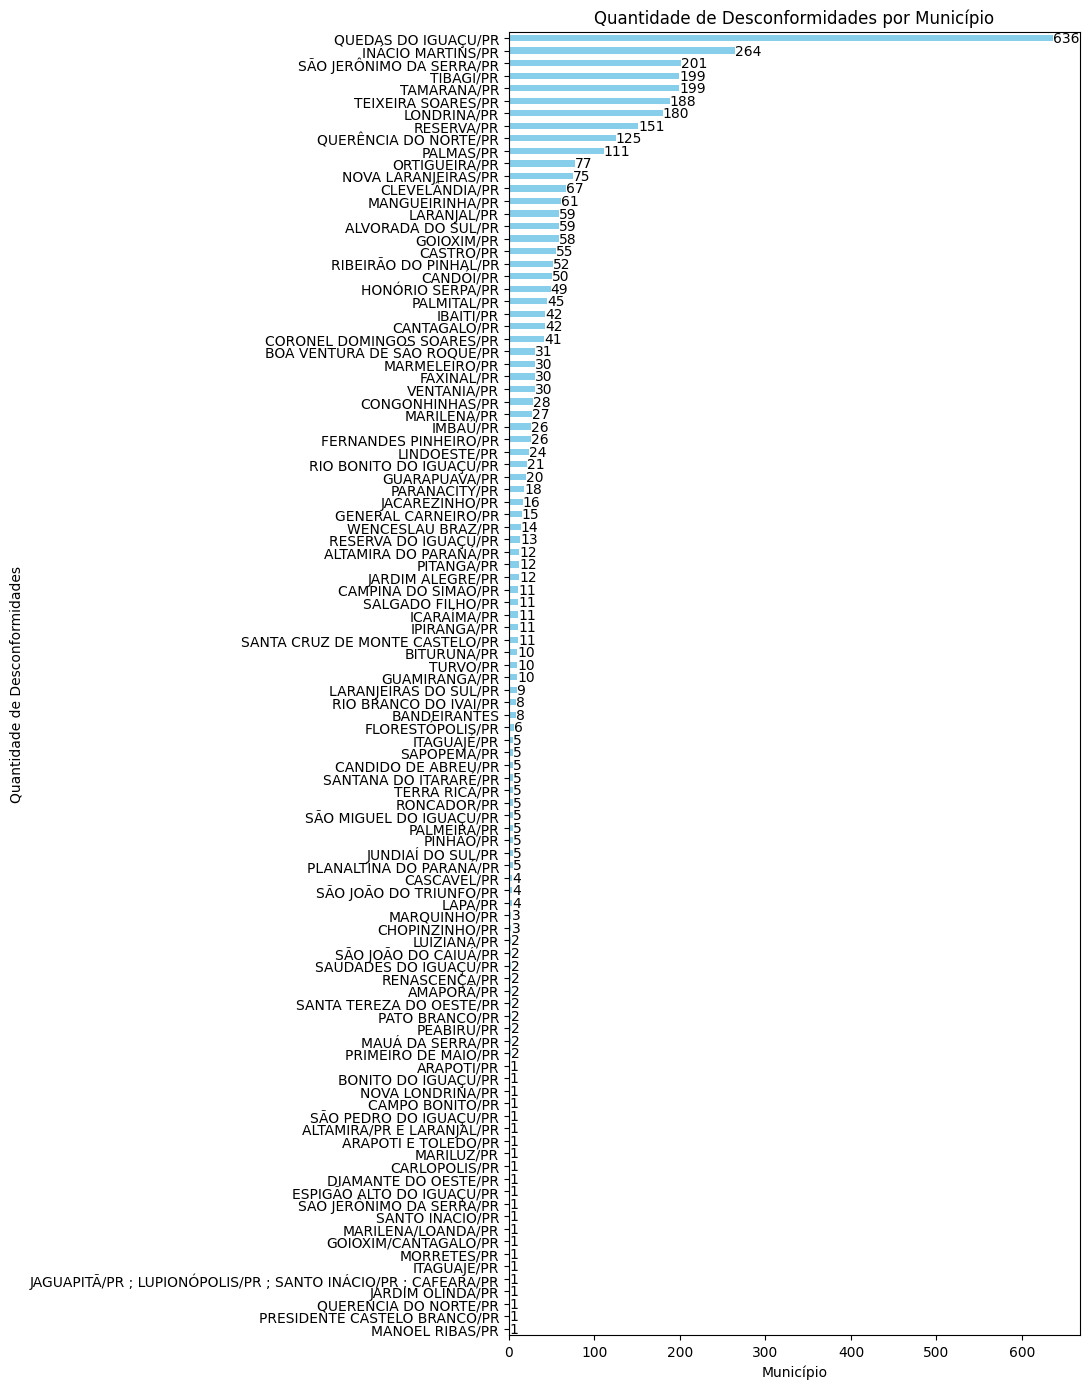

In [ ]:
# Visualiza√ß√£o de Desconformidades por Munic√≠pio com Ajustes
plt.figure(figsize=(11, 14))
ax = desconformidades_municipio_pa_digit.sort_values().plot(kind='barh', color='skyblue')
plt.title('Quantidade de Desconformidades por Munic√≠pio')
plt.xlabel('Munic√≠pio')
plt.ylabel('Quantidade de Desconformidades')

# Ajustar o limite inferior do eixo Y
ax.set_ylim(bottom=0.5)

# Adicionar labels nas barras usando bar_label
ax.bar_label(ax.containers[0], label_type='edge')

plt.tight_layout()
plt.show()

Situa√ß√£o
INSERIDO NO SEI - CONFERIDO, AGUARDANDO AUTENTICA√á√ÉO E ASSINATURA    4633
AGUARDANDO CONFER√äNCIA                                                396
INSERIDO NO SEI - AGUARDANDO CONFER√äNCIA                              369
INSERIDO NO SEI - ASSINADO E AUTENTICADO                              215
INSERIDO NO SEI - ALTERAR OU EDITAR INFORMA√á√ïES NO SEI                 56
INSERIDO NO SEI - Interrup√ß√£o de acesso ao SEI                         44
AGUARDANDO INSER√á√ÉO AO SEI                                             42
AGUARDANDO CONFER√äNCIA                                                  5
AGUARDANDO INDEXA√á√ÉO                                                    4
Name: count, dtype: int64


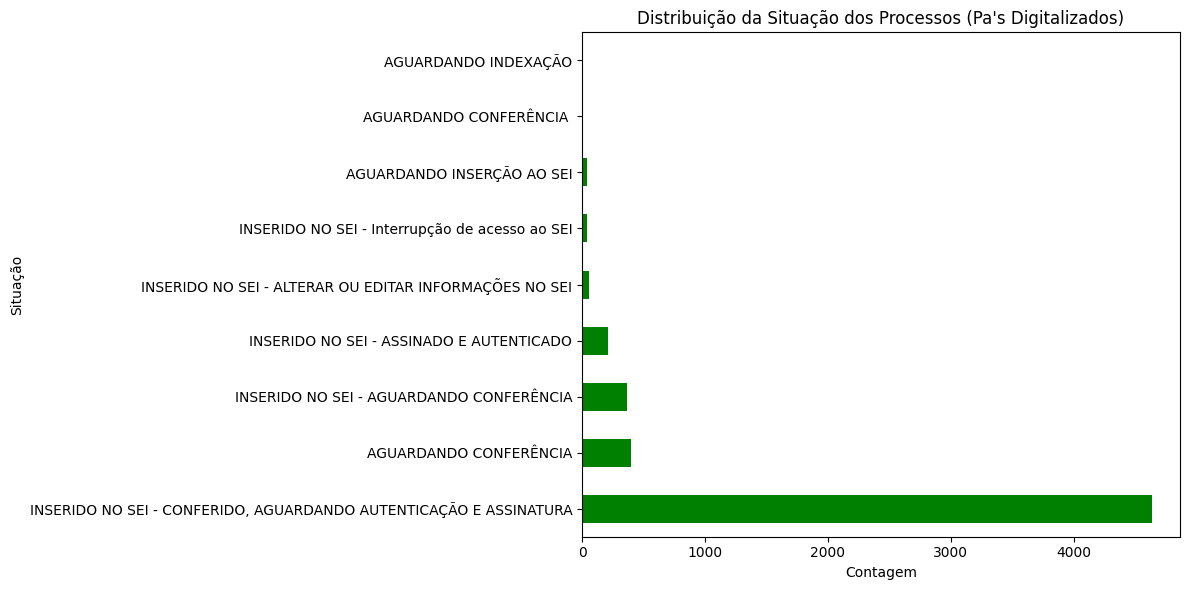

In [ ]:
# An√°lise da Situa√ß√£o dos Processos
situacao_contagem = pa_digit['Situa√ß√£o'].value_counts()
print(situacao_contagem)

# Visualiza√ß√£o da Situa√ß√£o dos Processos
plt.figure(figsize=(12, 6))
situacao_contagem.plot(kind='barh', color='green')
plt.title("Distribui√ß√£o da Situa√ß√£o dos Processos (Pa's Digitalizados)")
plt.xlabel('Contagem')
plt.ylabel('Situa√ß√£o')
plt.tight_layout()
plt.show()

Munic√≠pio
ALTAMIRA DO PARAN√Å/PR        31
ALTAMIRA/PR E LARANJAL/PR     0
ALVORADA DO SUL/PR           44
AMAPOR√É/PR                    3
ARAPONGAS/PR                  3
                             ..
TIBAGI/PR                    35
TOLEDO/PR                     1
TURVO/PR                     20
VENTANIA/PR                  26
WENCESLAU BRAZ/PR            14
Name: Lote/Parcela, Length: 113, dtype: int64


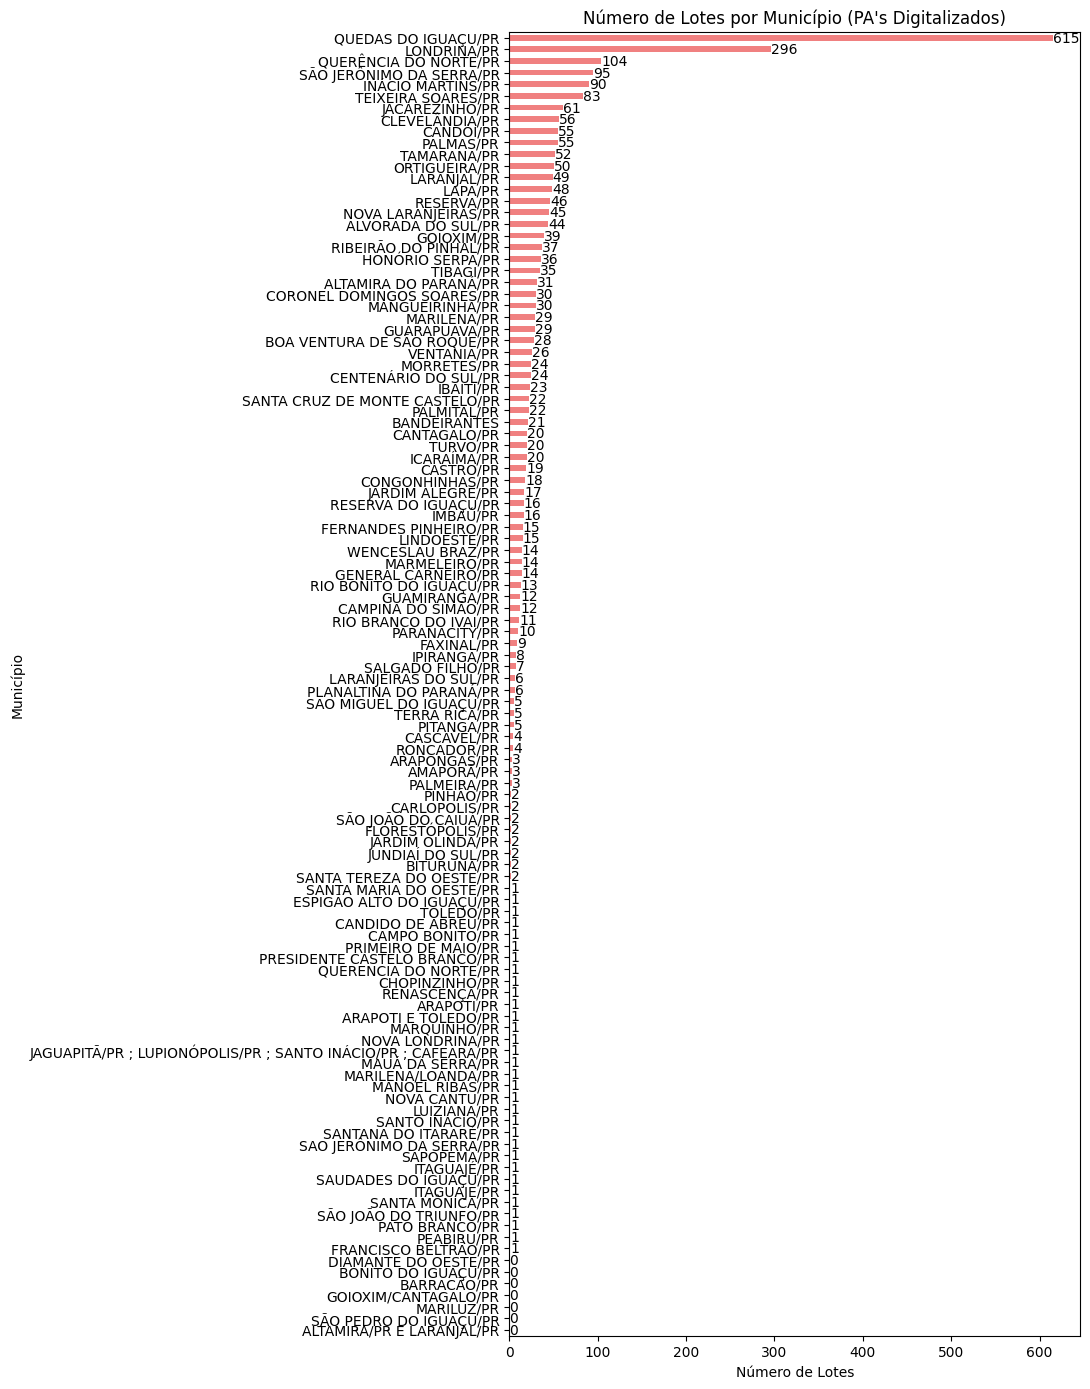

In [ ]:
# Relacionar n√∫mero de lotes com munic√≠pios
lotes_por_municipio = pa_digit.groupby('Munic√≠pio')['Lote/Parcela'].nunique()
print(lotes_por_municipio)
plt.figure(figsize=(11,14))
ax = lotes_por_municipio.sort_values().plot(kind='barh', color='lightcoral')
plt.title("N√∫mero de Lotes por Munic√≠pio (PA's Digitalizados)")
plt.xlabel('N√∫mero de Lotes')
plt.ylabel('Munic√≠pio')

# Ajustar o limite inferior do eixo Y
ax.set_ylim(bottom=0.5)

# Adicionar labels nas barras usando bar_label
ax.bar_label(ax.containers[0], label_type='edge')

plt.tight_layout()
plt.show()

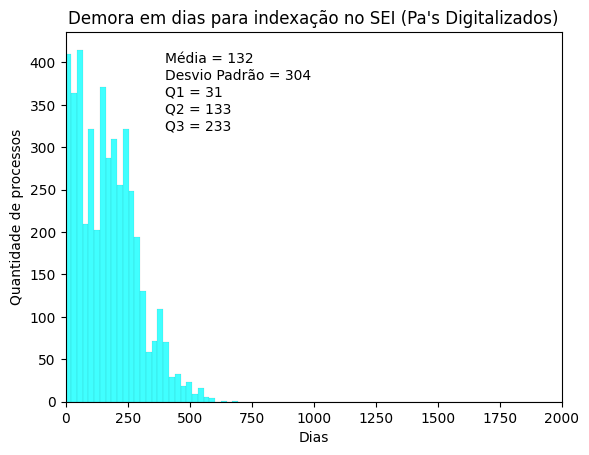

In [ ]:
#plotando a rela√ß√£o entre a demora de dias para indexa√ß√£o e a quantidade de processos.
media = np.mean(pa_digit['demora indexa√ß√£o'])
desv_padr√£o = np.std(pa_digit['demora indexa√ß√£o'])
quartis = pa_digit['demora indexa√ß√£o'].quantile([0.25, 0.5, 0.75])

sns.histplot(pa_digit['demora indexa√ß√£o'], edgecolor='black', color = 'cyan' )
plt.title("Demora em dias para indexa√ß√£o no SEI (Pa's Digitalizados)")
plt.ylabel('Quantidade de processos')
plt.xlabel('Dias')
plt.xlim([0,2000])
plt.text (400,400,'M√©dia = '+str(int(media)))
plt.text (400,380,'Desvio Padr√£o = '+str(int(desv_padr√£o)))
plt.text (400,360,'Q1 = '+str(int(quartis[0.25])))
plt.text (400,340,'Q2 = '+str(int(quartis[0.5])))
plt.text (400,320,'Q3 = '+str(int(quartis[0.75])))
plt.show()

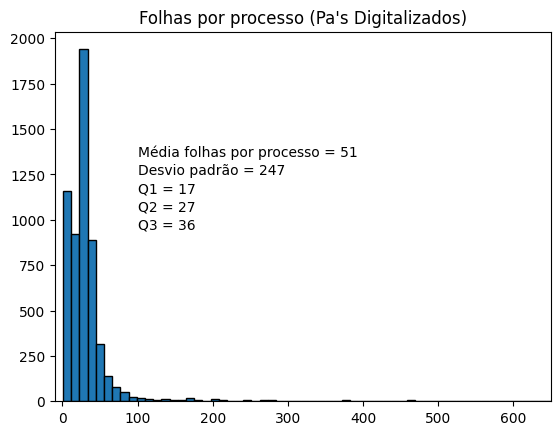

In [ ]:
#plotando a rela√ß√£o entre a quantidade de folhas e a quantidade de processos.
b = pa_digit['N¬∫ Folhas']
media = np.mean(b)
desv_padrao = np.std(b)
quartis = b.quantile([0.25, 0.5, 0.75])

plt.hist(b, bins=900, edgecolor='black')
plt.title("Folhas por processo (Pa's Digitalizados)")
plt.text (100,1350,'M√©dia folhas por processo = '+str(int(media)))
plt.text(100,1250,'Desvio padr√£o = '+str(int(desv_padrao)))
plt.text(100,1150,'Q1 = '+str(int(quartis[0.25])))
plt.text(100,1050,'Q2 = '+str(int(quartis[0.5])))
plt.text(100,950,'Q3 = '+str(int(quartis[0.75])))
plt.xlim([-10,650])
plt.show()

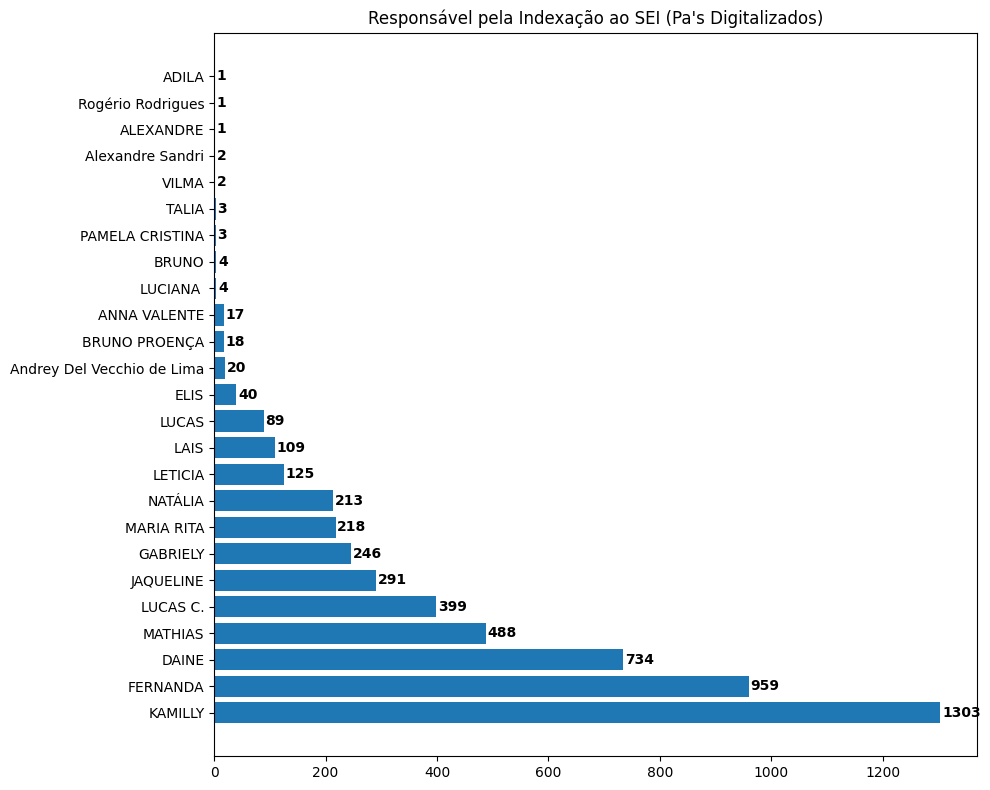

In [ ]:
#plotando a quantidade de documentos indexado no Sei por respons√°vel:
pa_digit_list =pa_digit['Respons√°vel pela Indexa√ß√£o ao SEI'].value_counts()
plt.figure(figsize=(10,8))
plt.barh(pa_digit_list.index, pa_digit_list)
plt.title("Respons√°vel pela Indexa√ß√£o ao SEI (Pa's Digitalizados)")
for i, v in enumerate(pa_digit_list):
    plt.text(v + 3, i, str(v), color='black', fontweight='bold', va='center')
plt.tight_layout()
plt.show()

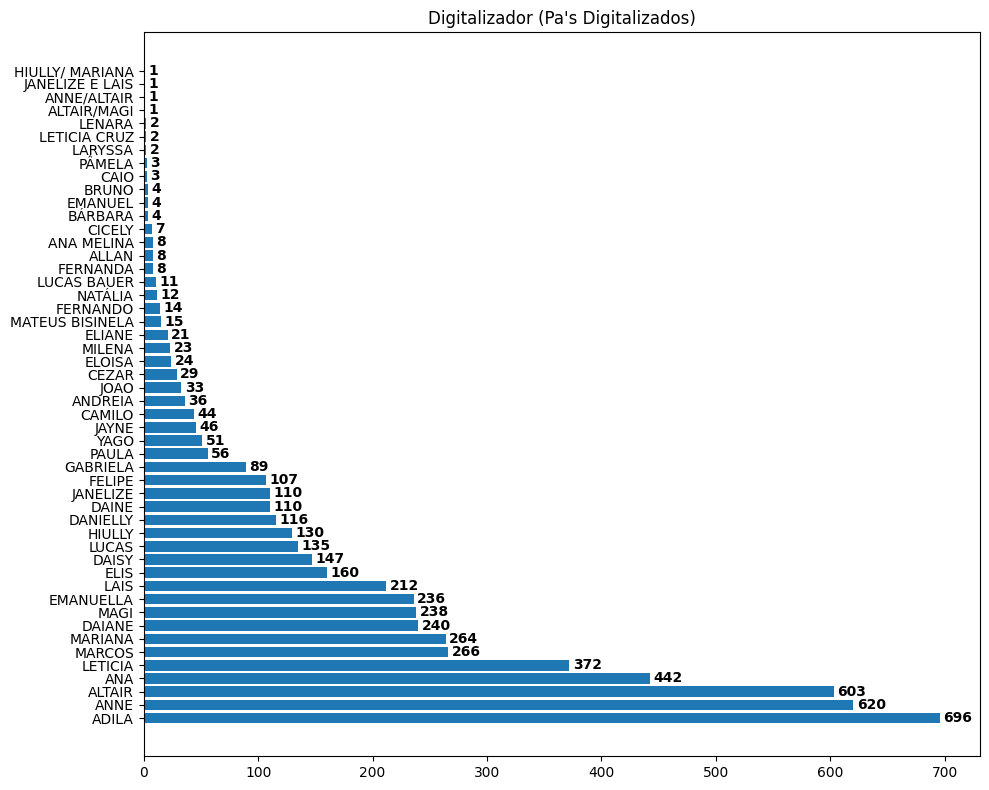

In [ ]:
#plotando a quantidade de documentos digitalizados por respons√°vel:
pa_digit_list = pa_digit['Digitalizador'].value_counts()
plt.figure(figsize=(10,8))
plt.barh(pa_digit_list.index, pa_digit_list)
plt.title("Digitalizador (Pa's Digitalizados)")
for i, v in enumerate(pa_digit_list):
    plt.text(v + 3, i, str(v), color='black', fontweight='bold', va='center')
plt.tight_layout()
plt.show()

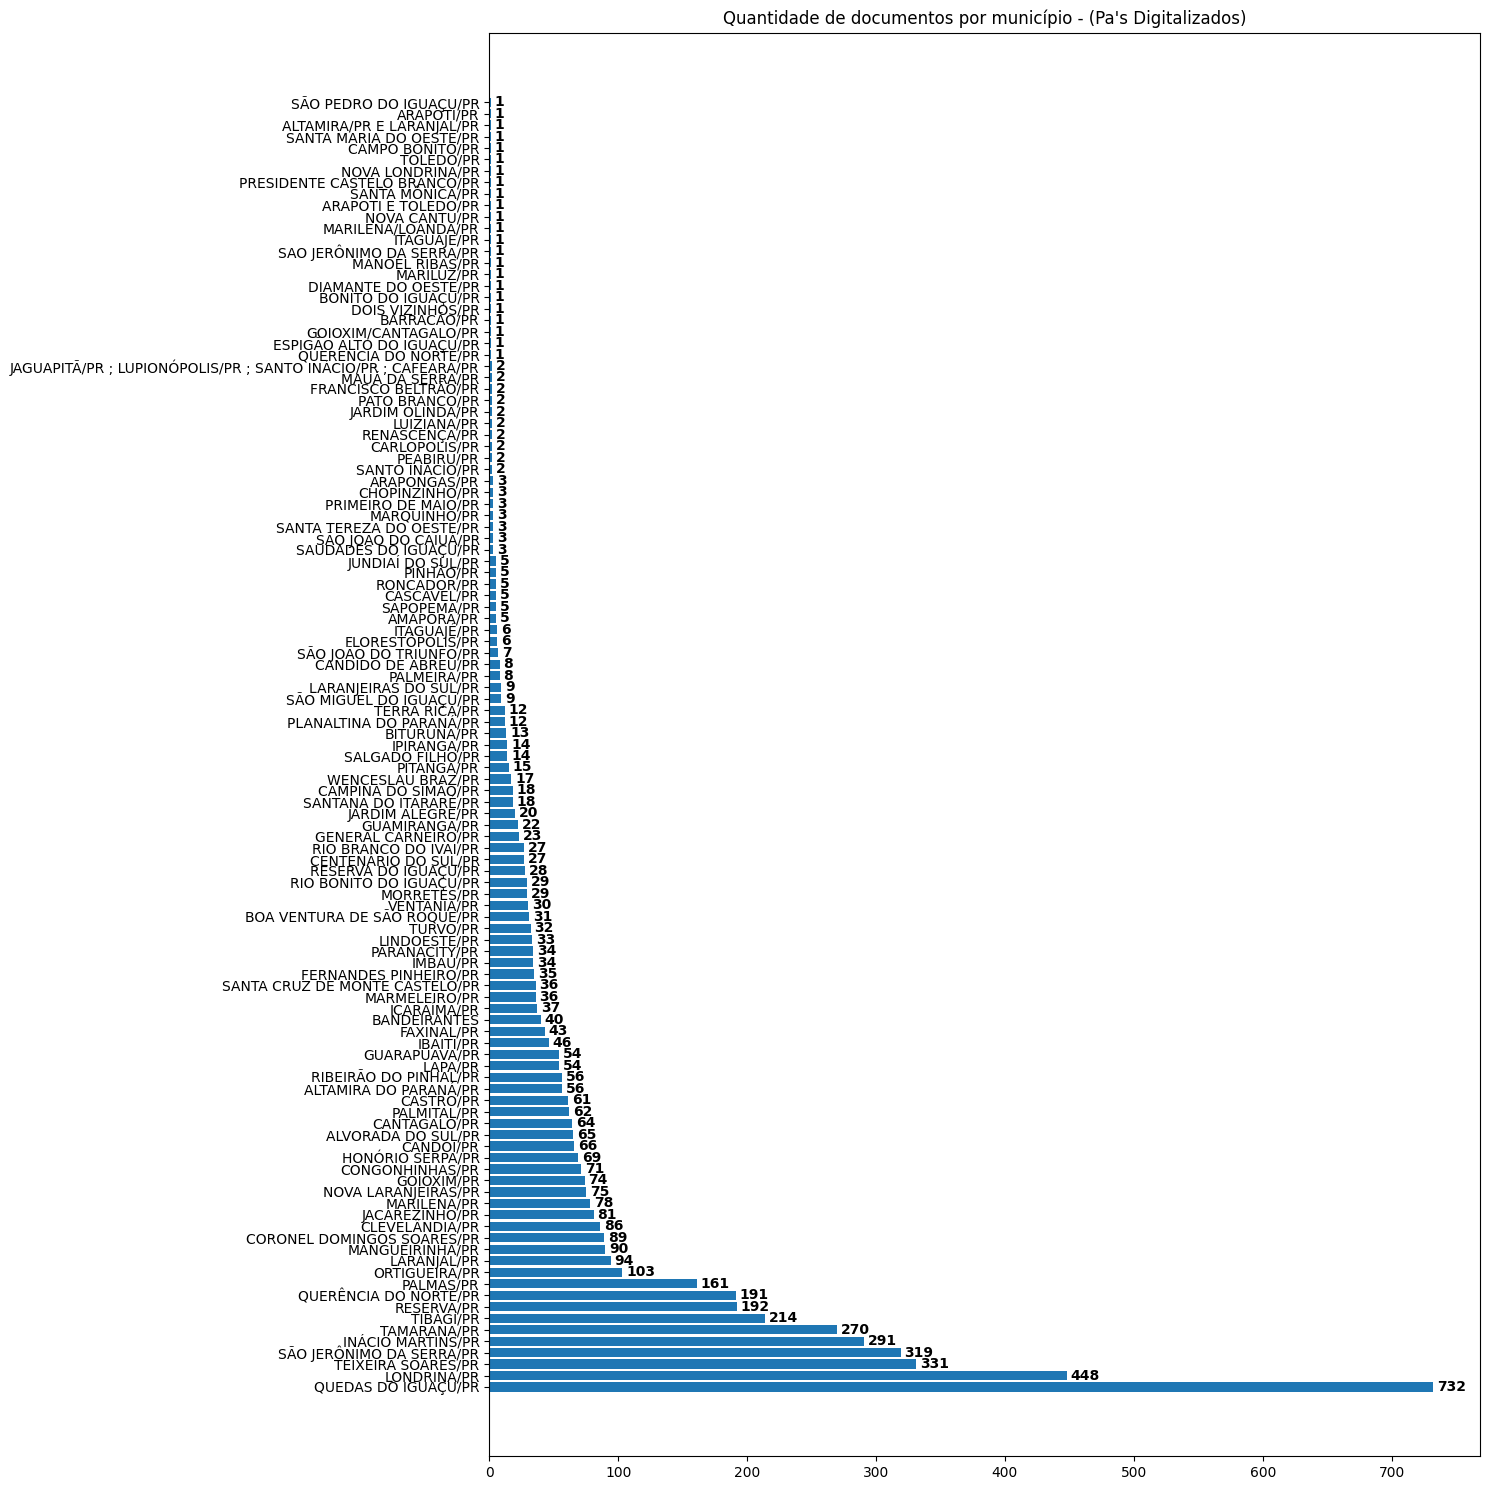

In [ ]:
#plotando a quantidade de documentos por munic√≠pio:
#plotando a quantidade de documentos por munic√≠pio:
pa_digit_list =pa_digit['Munic√≠pio'].value_counts()
plt.figure(figsize=(15,15))
plt.barh(pa_digit_list.index, pa_digit_list)
plt.title("Quantidade de documentos por munic√≠pio - (Pa's Digitalizados)")

# Add annotations (numbers inside bars)
for i, v in enumerate(pa_digit_list):
    plt.text(v + 3, i, str(v), color='black', fontweight='bold', va='center')

plt.tight_layout()
plt.show()

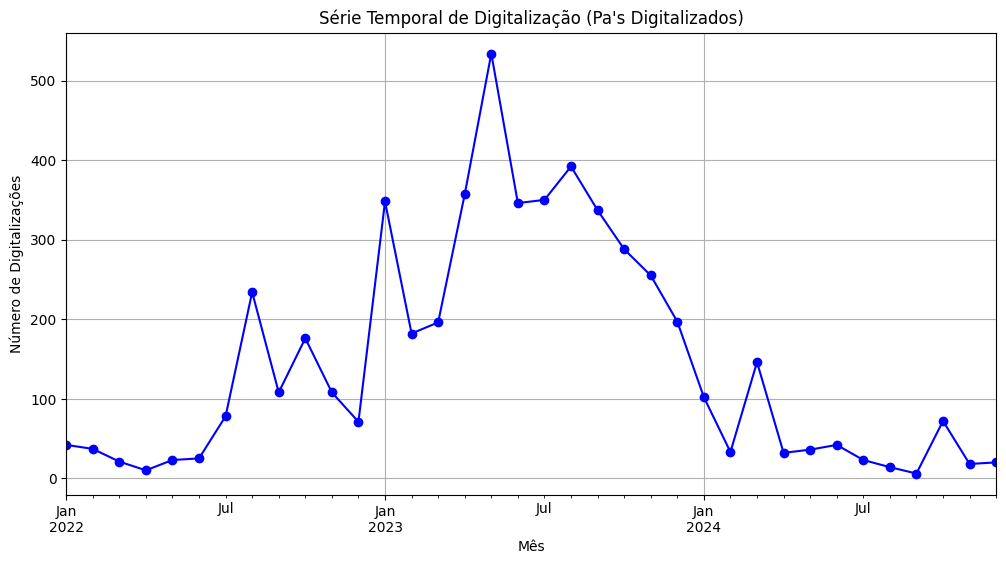

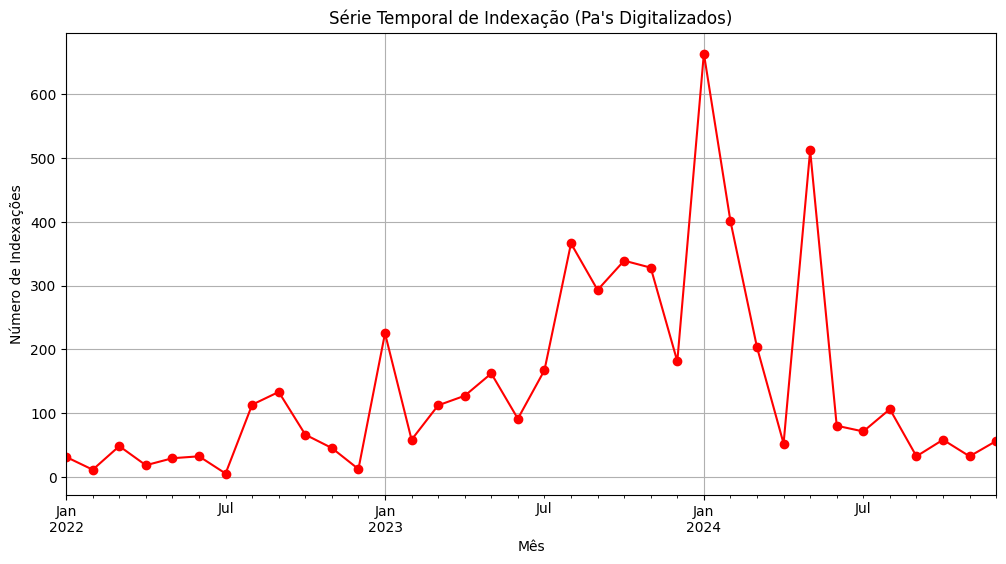

In [ ]:
# Remover entradas com datas nulas
pa_digit = pa_digit.dropna(subset=['Data da Digitaliza√ß√£o', 'Data da Indexa√ß√£o ao SEI'])

# Agrupar por m√™s
digitalizacao_por_mes = pa_digit['Data da Digitaliza√ß√£o'].groupby(pa_digit['Data da Digitaliza√ß√£o'].dt.to_period('M')).count()
indexacao_por_mes = pa_digit['Data da Indexa√ß√£o ao SEI'].groupby(pa_digit['Data da Indexa√ß√£o ao SEI'].dt.to_period('M')).count()

# Gr√°fico da S√©rie Temporal de Digitaliza√ß√£o
plt.figure(figsize=(12, 6))
digitalizacao_por_mes.plot(kind='line', marker='o', color='blue')
plt.title("S√©rie Temporal de Digitaliza√ß√£o (Pa's Digitalizados)")
plt.xlabel('M√™s')
plt.ylabel('N√∫mero de Digitaliza√ß√µes')
plt.grid(True)
plt.show()

# Gr√°fico da S√©rie Temporal de Indexa√ß√£o
plt.figure(figsize=(12, 6))
indexacao_por_mes.plot(kind='line', marker='o', color='red')
plt.title("S√©rie Temporal de Indexa√ß√£o (Pa's Digitalizados)")
plt.xlabel('M√™s')
plt.ylabel('N√∫mero de Indexa√ß√µes')
plt.grid(True)
plt.show()

# Processos Administrativos üê≥

In [ ]:
# An√°lise de Processos com Desconformidades
processos_desconformidades_proc_adm = proc_adm[(proc_adm['Desconformidades'].notna()) & (proc_adm['Desconformidades'] != 'N/C') & (proc_adm['Munic√≠pio'].notna()) & (proc_adm['Munic√≠pio'] != 'N/C')]

num_processos_desconformidades_proc_adm = len(processos_desconformidades_proc_adm)
print(f'N√∫mero de processos com desconformidades: {num_processos_desconformidades_proc_adm}')
desconformidades_contagem_proc_adm = processos_desconformidades_proc_adm['Desconformidades'].value_counts()
print(desconformidades_contagem_proc_adm)

# Agrupar por munic√≠pio, contar desconformidades e ordenar alfabeticamente
desconformidades_municipio_proc_adm = processos_desconformidades_proc_adm.groupby('Munic√≠pio').size().sort_index()

N√∫mero de processos com desconformidades: 53
Desconformidades
Folha de n¬∫ 03 parcialmente ileg√≠vel.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  

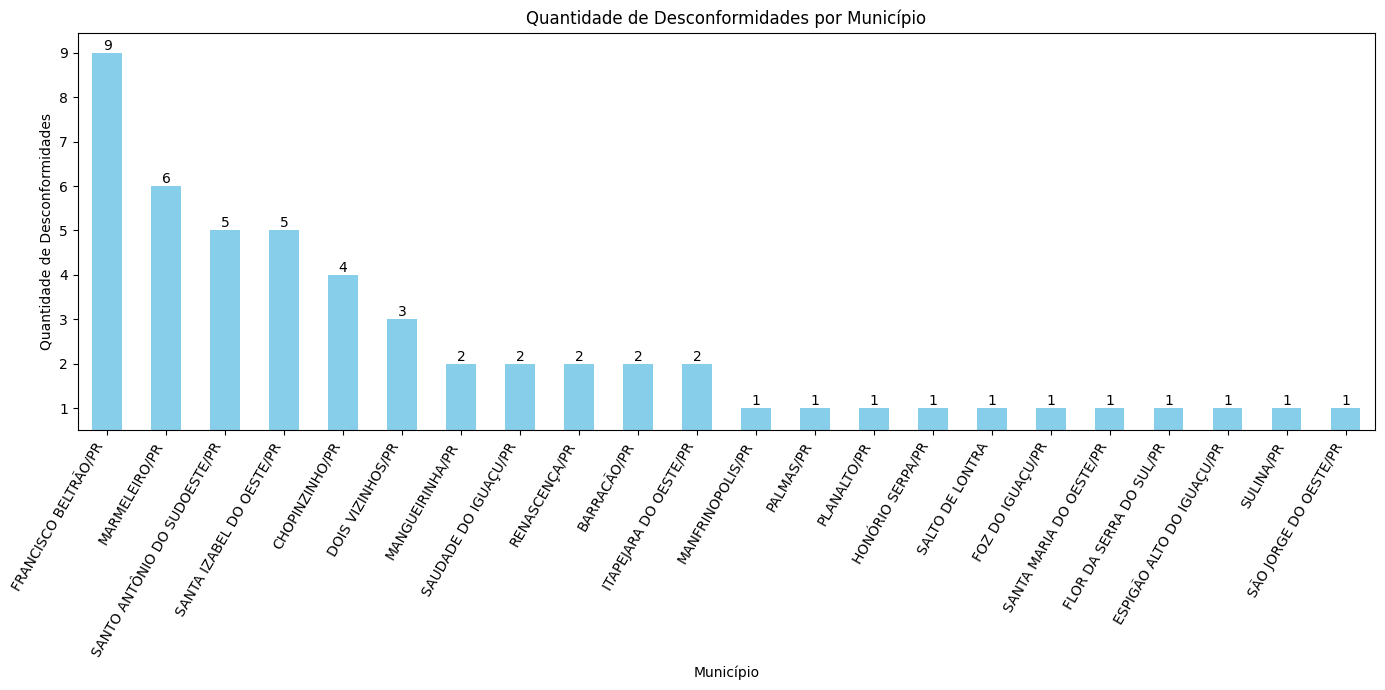

In [ ]:
# Visualiza√ß√£o de Desconformidades por Munic√≠pio com Ajustes
plt.figure(figsize=(14, 7))
ax = desconformidades_municipio_proc_adm.sort_values(ascending = False).plot(kind='bar', color='skyblue')
plt.title('Quantidade de Desconformidades por Munic√≠pio')
plt.xlabel('Munic√≠pio')
plt.ylabel('Quantidade de Desconformidades')

# Ajustar o limite inferior do eixo Y
ax.set_ylim(bottom=0.5)

# Adicionar labels nas barras usando bar_label
ax.bar_label(ax.containers[0], label_type='edge')

plt.xticks(rotation=60, ha='right')
plt.tight_layout()
plt.show()

Situa√ß√£o
INSERIDO NO SEI - CONFERIDO, AGUARDANDO AUTENTICA√á√ÉO E ASSINATURA    185
AGUARDANDO CONFER√äNCIA                                                 9
INSERIDO NO SEI - ALTERAR OU EDITAR INFORMA√á√ïES                        3
Name: count, dtype: int64


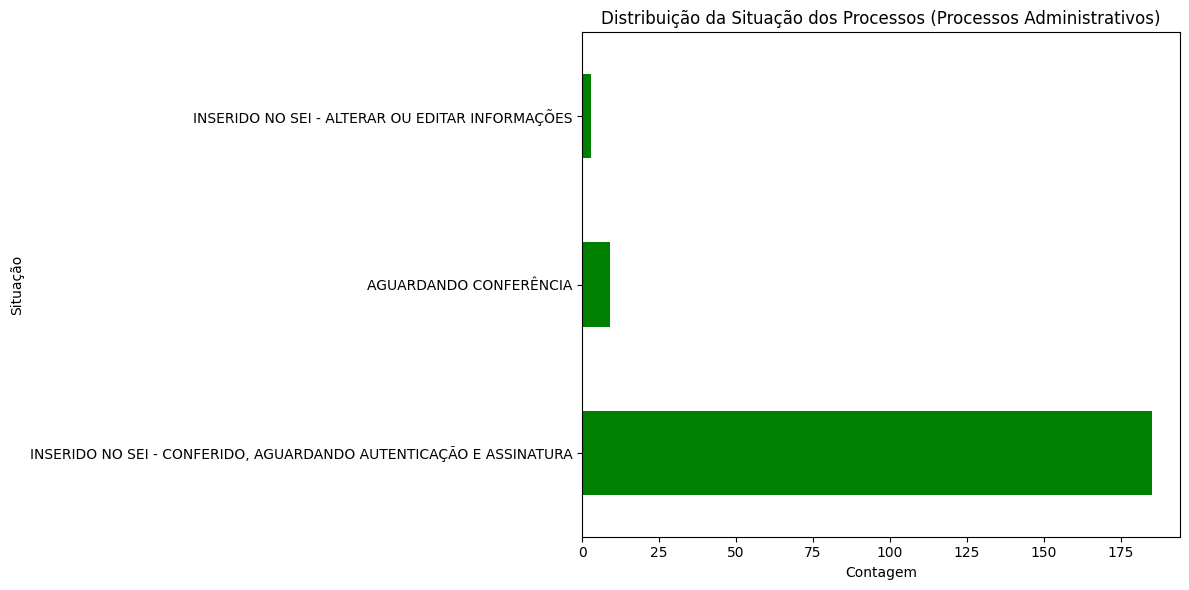

In [ ]:
# An√°lise da Situa√ß√£o dos Processos
situacao_contagem = proc_adm['Situa√ß√£o'].value_counts()
print(situacao_contagem)

# Visualiza√ß√£o da Situa√ß√£o dos Processos
plt.figure(figsize=(12, 6))
situacao_contagem.plot(kind='barh', color='green')
plt.title('Distribui√ß√£o da Situa√ß√£o dos Processos (Processos Administrativos)')
plt.xlabel('Contagem')
plt.ylabel('Situa√ß√£o')
plt.tight_layout()
plt.show()

Munic√≠pio
AMP√âRE/PR                        6
BARRAC√ÉO/PR                     12
BELA VISTA DA CAROBA/PR          1
BOA ESPERAN√áA DO IGUA√áU          3
BOM JESUS DO SUL/PR              1
CAPANEMA/PR                      2
CHOPINZINHO/PR                  10
CORONEL VIVIDA/PR                2
CRUZEIRO DO IGUA√áU/PR            1
DOIS VIZINHOS/PR                 6
EN√âAS MARQUES/PR                 2
ESPIG√ÉO ALTO DO IGUA√áU/PR        1
FLOR DA SERRA DO SUL/PR          3
FOZ DO IGUA√áU/PR                 1
FRANCISCO BELTR√ÉO/PR            14
HON√ìRIO SERPA/PR                 1
ITAPEJARA DO OESTE/PR            2
LINDOESTE/PR                     1
MANFRINOPOLIS/PR                 1
MANGUEIRINHA/PR                  3
MARINOPOLIS/PR                   1
MARMELEIRO/PR                   24
NOVA PRATA DO IGUA√áU/PR          3
PALMAS/PR                        2
PALMITAL/PR                      1
PATO BRANCO/PR                   1
PINHAL DE S√ÉO BENTO/PR           2
PLANALTO/PR                    

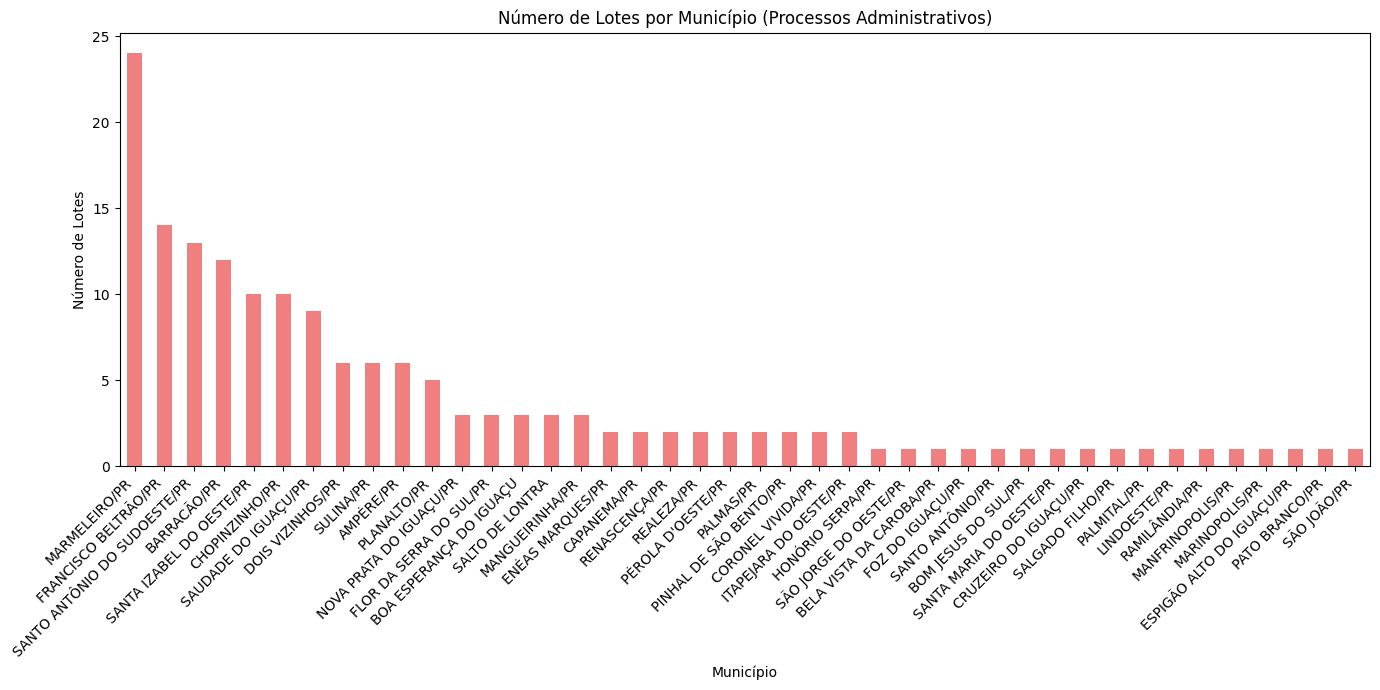

In [ ]:
# Relacionar n√∫mero de lotes com munic√≠pios
lotes_por_municipio = proc_adm.groupby('Munic√≠pio')['Lote/Parcela'].nunique()
print(lotes_por_municipio)
plt.figure(figsize=(14, 7))
lotes_por_municipio.sort_values(ascending = False).plot(kind='bar', color='lightcoral')
plt.title('N√∫mero de Lotes por Munic√≠pio (Processos Administrativos)')
plt.xlabel('Munic√≠pio')
plt.ylabel('N√∫mero de Lotes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

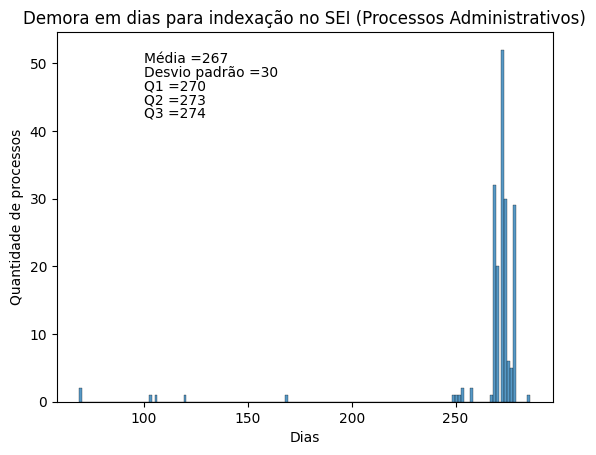

In [ ]:
#plotando a rela√ß√£o entre a demora de dias para indexa√ß√£o e a quantidade de processos.
a = np.mean(proc_adm['demora indexa√ß√£o'])
b = np.std(proc_adm['demora indexa√ß√£o'])
quartis = proc_adm['demora indexa√ß√£o'].quantile([0.25, 0.5, 0.75])

sns.histplot(proc_adm['demora indexa√ß√£o'])
plt.title('Demora em dias para indexa√ß√£o no SEI (Processos Administrativos)')
plt.ylabel('Quantidade de processos')
plt.xlabel('Dias')
plt.text (100,50,'M√©dia ='+str(int(a)))
plt.text (100,48,'Desvio padr√£o ='+str(int(b)))
plt.text (100,46,'Q1 ='+str(int(quartis[0.25])))
plt.text (100,44,'Q2 ='+str(int(quartis[0.5])))
plt.text (100,42,'Q3 ='+str(int(quartis[0.75])))
plt.show()

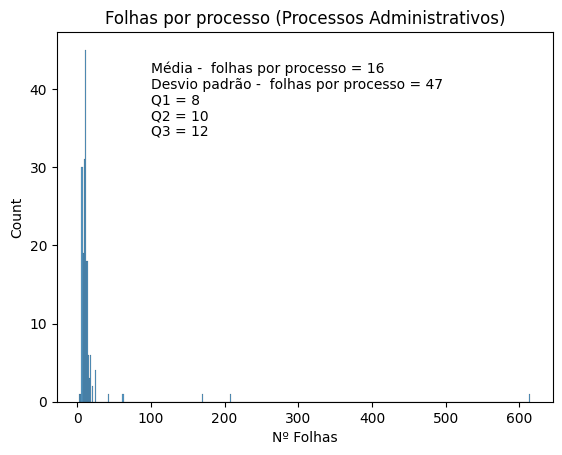

In [ ]:
#plotando a rela√ß√£o entre a quantidade de folhas e a quantidade de processos.
a = proc_adm['N¬∫ Folhas']
aa = np.mean(a)
bb = np.std(a)
quartis = a.quantile([0.25, 0.5, 0.75])

sns.histplot(a)
plt.title('Folhas por processo (Processos Administrativos)')
plt.text (100,42,'M√©dia -  folhas por processo = '+str(int(aa)))
plt.text (100,40,'Desvio padr√£o -  folhas por processo = '+str(int(bb)))
plt.text (100,38,'Q1 = '+str(int(quartis[0.25])))
plt.text (100,36,'Q2 = '+str(int(quartis[0.5])))
plt.text (100,34,'Q3 = '+str(int(quartis[0.75])))
plt.show()

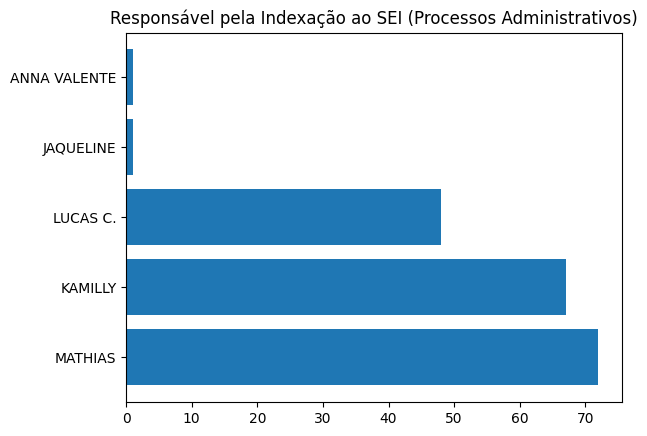

In [ ]:
#plotando a quantidade de documentos indexado no Sei por respons√°vel:
proc_adm_list =proc_adm['Respons√°vel pela Indexa√ß√£o ao SEI'].value_counts()
plt.barh(proc_adm_list.index, proc_adm_list)
plt.title('Respons√°vel pela Indexa√ß√£o ao SEI (Processos Administrativos)')
plt.show()

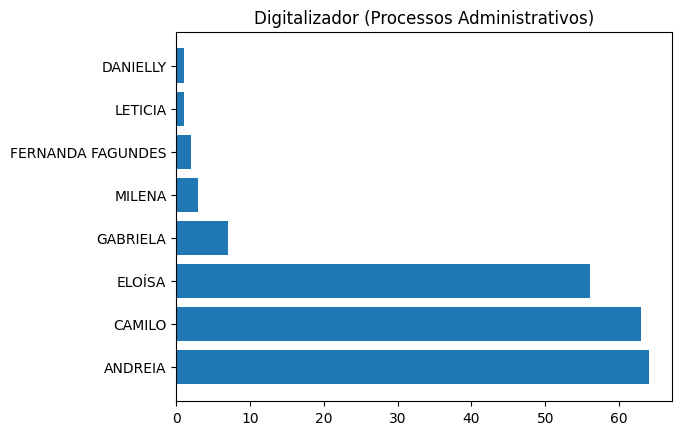

In [ ]:
#plotando a quantidade de documentos digitalizados por respons√°vel:
proc_adm_list =proc_adm['Digitalizador'].value_counts()
plt.barh(proc_adm_list.index, proc_adm_list)
plt.title('Digitalizador (Processos Administrativos)')
plt.show()

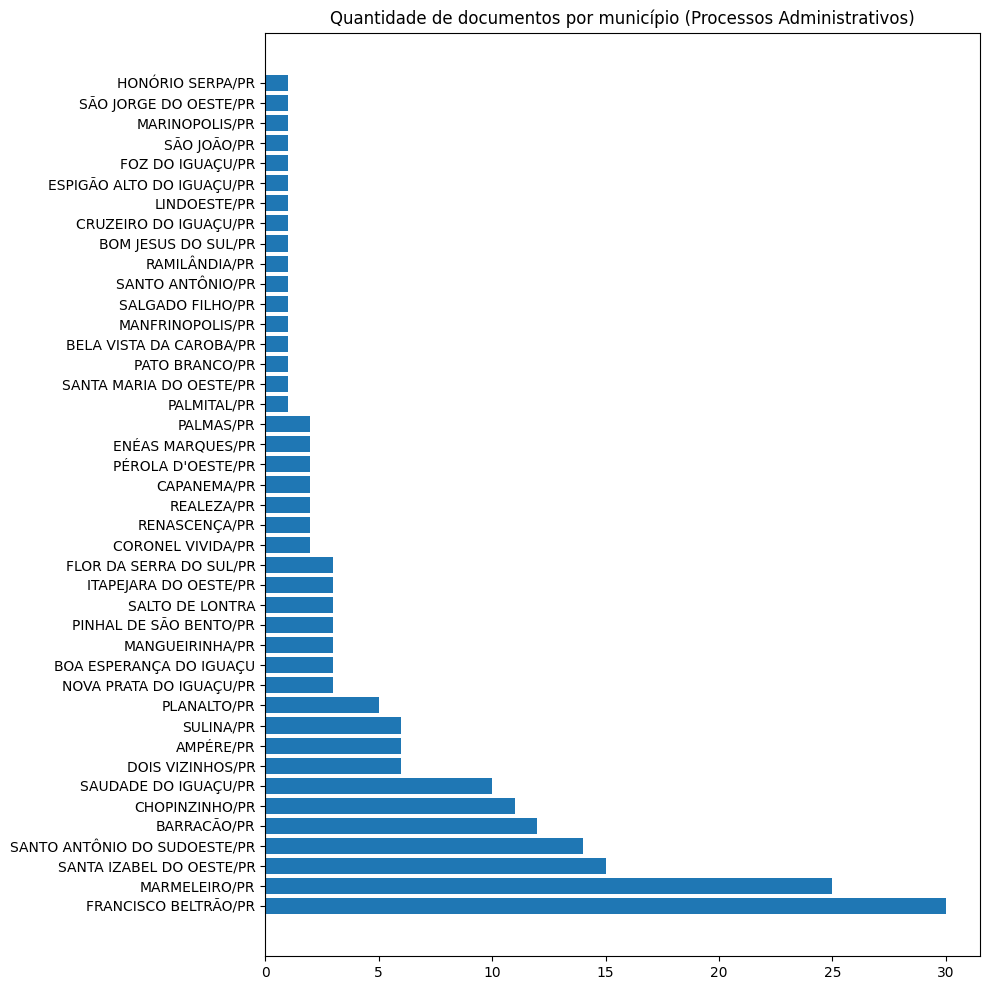

In [ ]:
#plotando a quantidade de documentos por munic√≠pio:
proc_adm_list =proc_adm['Munic√≠pio'].value_counts()
plt.figure(figsize=(10,10))
plt.barh(proc_adm_list.index, proc_adm_list)
plt.title('Quantidade de documentos por munic√≠pio (Processos Administrativos)')
plt.tight_layout()
plt.show()

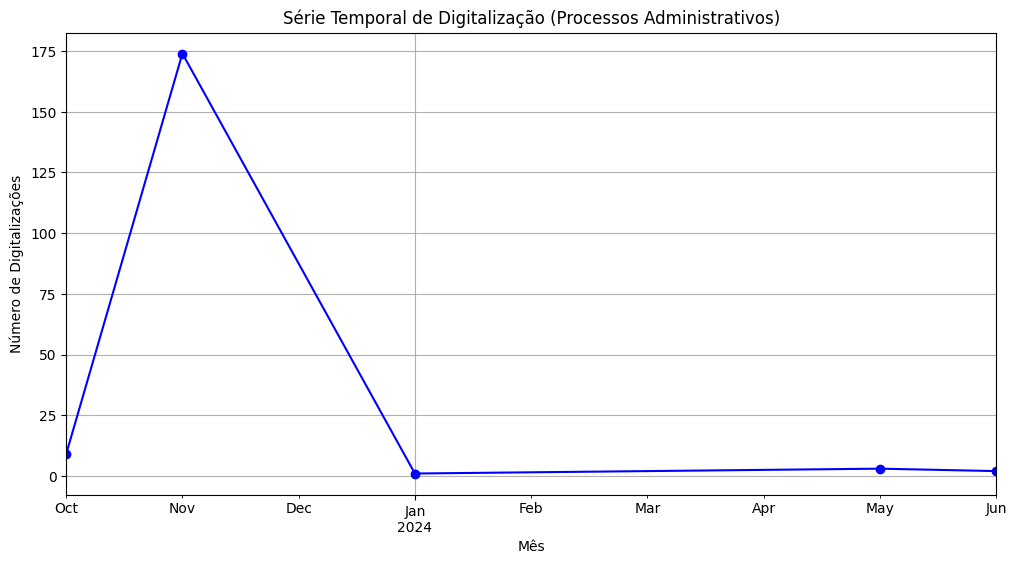

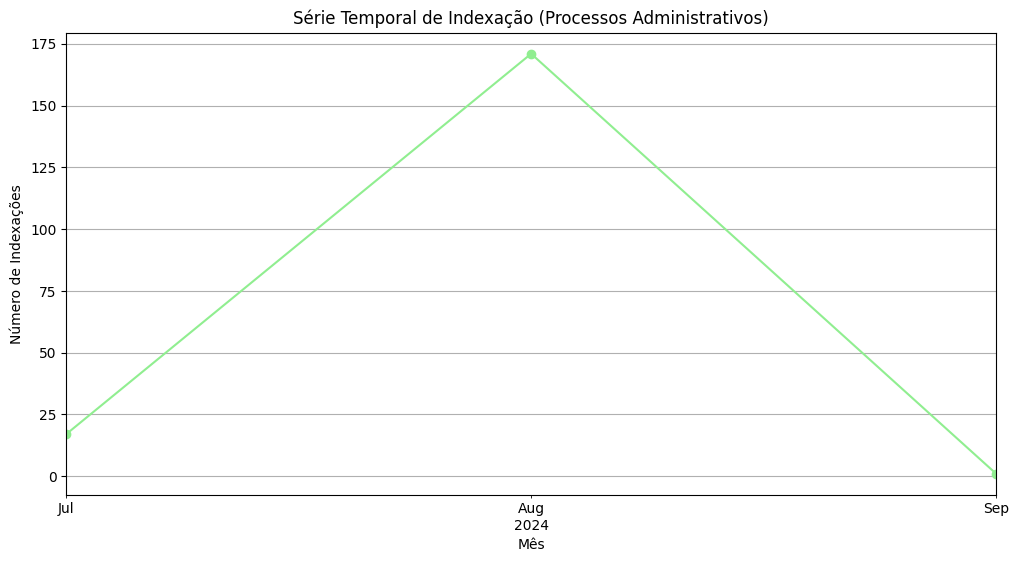

In [ ]:
# Remover entradas com datas nulas
proc_adm = proc_adm.dropna(subset=['Data da Digitaliza√ß√£o', 'Data da Indexa√ß√£o ao SEI'])

# Agrupar por m√™s
digitalizacao_por_mes = proc_adm['Data da Digitaliza√ß√£o'].groupby(proc_adm['Data da Digitaliza√ß√£o'].dt.to_period('M')).count()
indexacao_por_mes = proc_adm['Data da Indexa√ß√£o ao SEI'].groupby(proc_adm['Data da Indexa√ß√£o ao SEI'].dt.to_period('M')).count()

# Gr√°fico da S√©rie Temporal de Digitaliza√ß√£o
plt.figure(figsize=(12, 6))
digitalizacao_por_mes.plot(kind='line', marker='o', color='blue')
plt.title('S√©rie Temporal de Digitaliza√ß√£o (Processos Administrativos)')
plt.xlabel('M√™s')
plt.ylabel('N√∫mero de Digitaliza√ß√µes')
plt.grid(True)
plt.show()

# Gr√°fico da S√©rie Temporal de Indexa√ß√£o
plt.figure(figsize=(12, 6))
indexacao_por_mes.plot(kind='line', marker='o', color='lightgreen')
plt.title('S√©rie Temporal de Indexa√ß√£o (Processos Administrativos)')
plt.xlabel('M√™s')
plt.ylabel('N√∫mero de Indexa√ß√µes')
plt.grid(True)
plt.show()

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np

# Carregue o shapefile BR_Municipios_2022 (substitua pelo caminho correto do seu shapefile)
brasil = gpd.read_file('/content/Prog_ap/BR_Municipios_2022.shx', driver='ESRI Shapefile')
print(brasil.head())



/usr/local/lib/python3.10/dist-packages/pyogrio/raw.py:198: RuntimeWarning: driver ESRI Shapefile does not support open option DRIVER
  return ogr_read(


    CD_MUN                 NM_MUN SIGLA_UF  AREA_KM2  \
0  1100015  Alta Floresta D'Oeste       RO  7067.127   
1  1100023              Ariquemes       RO  4426.571   
2  1100031                 Cabixi       RO  1314.352   
3  1100049                 Cacoal       RO  3793.000   
4  1100056             Cerejeiras       RO  2783.300   

                                            geometry  
0  POLYGON ((-62.00806 -12.13379, -62.00784 -12.2...  
1  POLYGON ((-63.17933 -10.13924, -63.17746 -10.1...  
2  POLYGON ((-60.52408 -13.32137, -60.37162 -13.3...  
3  POLYGON ((-61.35502 -11.50452, -61.35524 -11.5...  
4  POLYGON ((-60.82135 -13.1191, -60.81773 -13.12...  


ValueError: aspect must be finite and positive 

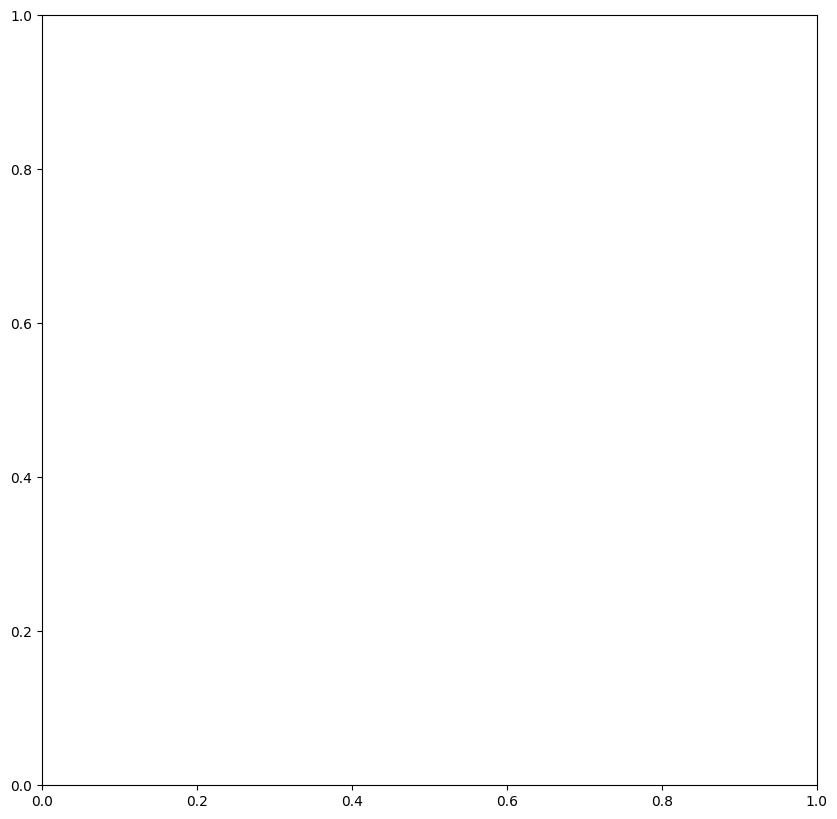

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np

# Carregue o shapefile BR_Municipios_2022 (substitua pelo caminho correto do seu shapefile)
brasil = gpd.read_file('/content/Prog_ap/BR_Municipios_2022.shp')

# Filtre os munic√≠pios do Paran√°
parana = brasil[brasil['SIGLA_UF'] == 'PR']

# Filtre os munic√≠pios da regi√£o oeste (substitua pelos c√≥digos IBGE corretos dos munic√≠pios)
codigos_ibge_oeste = [4100401, 4104809, 4127604, 4112653, 4115202, 4122407, 4107606, 4118404]  # Exemplo: Foz do Igua√ßu, Cascavel, Toledo...
oeste_do_parana = parana[parana['CD_MUN'].isin(codigos_ibge_oeste)]

# Gere dados aleat√≥rios para cada munic√≠pio
oeste_do_parana['Dados_Aleatorios'] = np.random.randint(1, 100, size=len(oeste_do_parana))

# Crie o mapa de cores
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
oeste_do_parana.plot(column='Dados_Aleatorios', cmap='viridis', legend=True, ax=ax)
ax.set_title('Mapa de Cores com Dados Aleat√≥rios - Regi√£o Oeste do Paran√°')
plt.show()